### Market segmentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

In [2]:
data = pd.read_csv('data/clustering_example_project.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


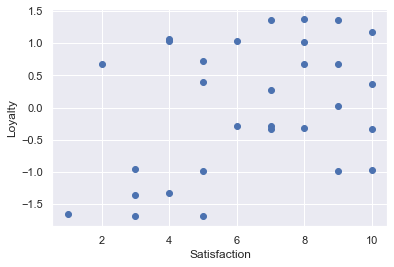

In [4]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty');

In [5]:
x = data.copy()

In [6]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [7]:
clusters_df = x.copy()
clusters_df['Clusters'] = kmeans.fit_predict(x)

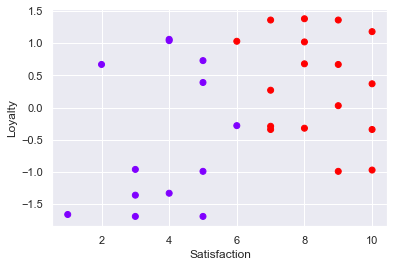

In [9]:
plt.scatter(clusters_df['Satisfaction'], clusters_df['Loyalty'], c=clusters_df['Clusters'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty');

Because Satisfaction has much bigger values, KMeans divided the data only using satisfaction values, not considering Loyalty. We can see it on the plot - we can draw vertical line at number 6 which divides the dataset into two clusters. 

In this case we should use standardization for the KMeans to treat both of those variables equally.

#### Standardization

In [10]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

### Elbow method

In [11]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

E:\Miniconda\Udemy\env\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.464232350204886,
 4.453263690150965,
 3.7853513108384]

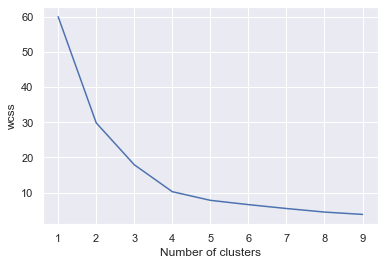

In [14]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss');

### KMeans for different number of clusters

In [17]:
kmeans_2 = KMeans(2)
kmeans_2.fit(x_scaled)
df_2 = x.copy()
df_2['Clusters'] = kmeans_2.fit_predict(x_scaled)
df_2.head()

,Satisfaction,Loyalty,Clusters
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,0


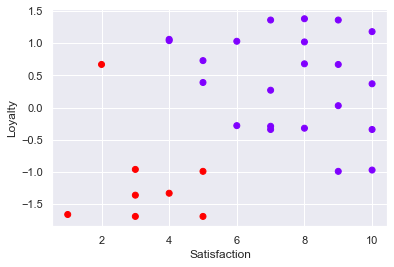

In [18]:
plt.scatter(df_2['Satisfaction'], df_2['Loyalty'], c=df_2['Clusters'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty');